# kmens 등급 나누기 코드 

In [29]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

data=pd.read_excel('./부실 이분류 및 등급 검증_최종 다분류 테스트용_0603.xlsx')

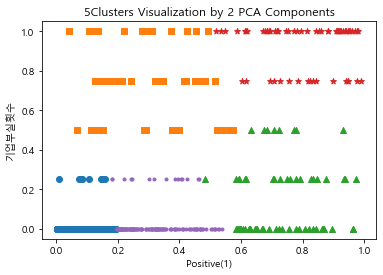

In [30]:

import warnings
warnings.filterwarnings('ignore')
marker0_ind = data[data['cluster']==0].index
marker1_ind = data[data['cluster']==1].index
marker2_ind = data[data['cluster']==2].index
marker3_ind = data[data['cluster']==3].index
marker4_ind = data[data['cluster']==4].index
# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 Positive(1), 횟수
plt.scatter(x=data.loc[marker0_ind, 'Positive(1)'], y=data.loc[marker0_ind, '횟수'], marker='o')
plt.scatter(x=data.loc[marker1_ind, 'Positive(1)'], y=data.loc[marker1_ind, '횟수'], marker='s')
plt.scatter(x=data.loc[marker2_ind, 'Positive(1)'], y=data.loc[marker2_ind, '횟수'], marker='^')
plt.scatter(x=data.loc[marker3_ind, 'Positive(1)'], y=data.loc[marker3_ind, '횟수'], marker='*')
plt.scatter(x=data.loc[marker4_ind, 'Positive(1)'], y=data.loc[marker4_ind, '횟수'], marker='.')


plt.xlabel('Positive(1)')
plt.ylabel('기업부실횟수')
plt.title('5Clusters Visualization by 2 PCA Components')
plt.rcParams['font.family'] =  'Malgun Gothic'

plt.show()

In [31]:
data['K1_Score_ad'].value_counts()

0    632
1    131
Name: K1_Score_ad, dtype: int64

In [32]:
data['y_pred'].value_counts()

0    622
1    141
Name: y_pred, dtype: int64

In [33]:
data['cluster'].value_counts()

0    446
4    138
2     65
3     62
1     52
Name: cluster, dtype: int64

In [34]:
data['판단'].value_counts()

완전건전    446
건전      138
부실       65
완전부실     62
보통       52
Name: 판단, dtype: int64

In [35]:
data['부실판단'].value_counts()

0    584
1    179
Name: 부실판단, dtype: int64

### 혼동행렬 출력 

In [22]:
#cat boost 독단으로만 한 혼동행렬 출력 
# from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# y_train_pred = cross_val_predict(model, X_train, y_train_7, cv=3)
cf = confusion_matrix(data['K1_Score_ad'],data['y_pred'])
cf=pd.DataFrame(cf)
cf

,0,1
0,585,47
1,37,94


In [36]:
F1_Score = f1_score(data['K1_Score_ad'],data['y_pred'])
F1_Score

0.6911764705882353

In [37]:
### k means 까지 더한 혼동행렬 출력 
from sklearn.metrics import confusion_matrix
cf = confusion_matrix( data['K1_Score_ad'],data['부실판단'])
cf=pd.DataFrame(cf)
cf

,0,1
0,573,59
1,11,120


In [38]:
F1_Score = f1_score(data['K1_Score_ad'],data['부실판단'])
F1_Score

0.7741935483870968

In [16]:
# mydata=data[['Positive(1)','분수']]
# # kmeans 객체 생성
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, random_state=0)

# kmeans.fit(mydata)

KMeans(max_iter=10, n_clusters=5, random_state=0)

In [ ]:
# # 각 데이터들마다 centroid(군집 중심점) 할당됨
# print(kmeans.labels_)
# mydata['cluster'] = kmeans.labels_

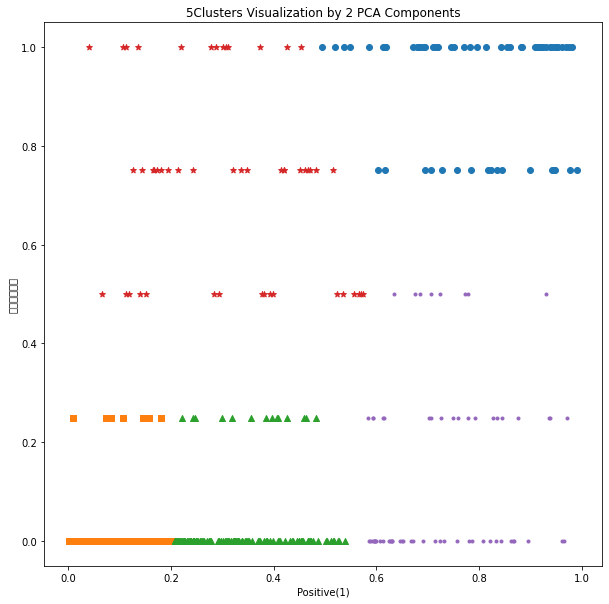

In [4]:
# import warnings
# warnings.filterwarnings('ignore')
# # cluster 값이 0, 1, 2인 경우마다 별도의 Index로 추출
# marker0_ind = mydata[mydata['cluster']==0].index
# marker1_ind = mydata[mydata['cluster']==1].index
# marker2_ind = mydata[mydata['cluster']==2].index
# marker3_ind = mydata[mydata['cluster']==3].index
# marker4_ind = mydata[mydata['cluster']==4].index
# fig = plt.figure( figsize = (10, 10))
# # cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 Positive(1), 분수
# # 값 추출. o, s, ^로 marker 표시
# plt.scatter(x=mydata.loc[marker0_ind, 'Positive(1)'], y=mydata.loc[marker0_ind, '분수'], marker='o')
# plt.scatter(x=mydata.loc[marker1_ind, 'Positive(1)'], y=mydata.loc[marker1_ind, '분수'], marker='s')
# plt.scatter(x=mydata.loc[marker2_ind, 'Positive(1)'], y=mydata.loc[marker2_ind, '분수'], marker='^')
# plt.scatter(x=mydata.loc[marker3_ind, 'Positive(1)'], y=mydata.loc[marker3_ind, '분수'], marker='*')
# plt.scatter(x=mydata.loc[marker4_ind, 'Positive(1)'], y=mydata.loc[marker4_ind, '분수'], marker='.')


# plt.xlabel('Positive(1)')
# plt.ylabel('기업부실횟수')
# plt.title('5Clusters Visualization by 2 PCA Components')
# plt.show()